In [61]:
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime

file_name = '20231120-23-20_1e4_lala.npz'

current_dir = os.getcwd()
new_dir = f'{current_dir}/'
file_dir = f'{new_dir}{file_name}'

npzfile = np.load(file_dir)

keys = npzfile.files
for key in keys:
    locals()[key] = npzfile[key]
# print('keys:',keys)    
# keys: ['T', 'eps', 'muT', 'muB', 'Tcell_num', 'B_num', 'size', 'E_mean', 'E_variance', 'num_runs']

E_var = E_variance
T_num = Tcell_num

1250 2500
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0


/var/folders/lp/dfnyzrns3slc8zy7xmm5hnl80000gn/T/ipykernel_29810/1956067801.py:23: RuntimeWarning: divide by zero encountered in log
  G[i] = (1-x)*G_T + x*G_B - T[i]*(x*np.log(x)+(1-x)*np.log(1-x))
/var/folders/lp/dfnyzrns3slc8zy7xmm5hnl80000gn/T/ipykernel_29810/1956067801.py:23: RuntimeWarning: invalid value encountered in scalar multiply
  G[i] = (1-x)*G_T + x*G_B - T[i]*(x*np.log(x)+(1-x)*np.log(1-x))


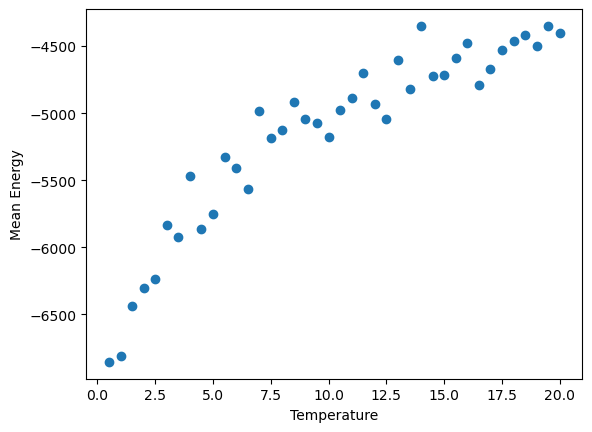

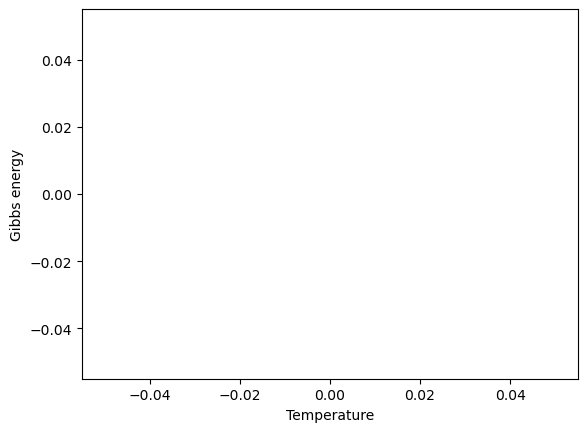

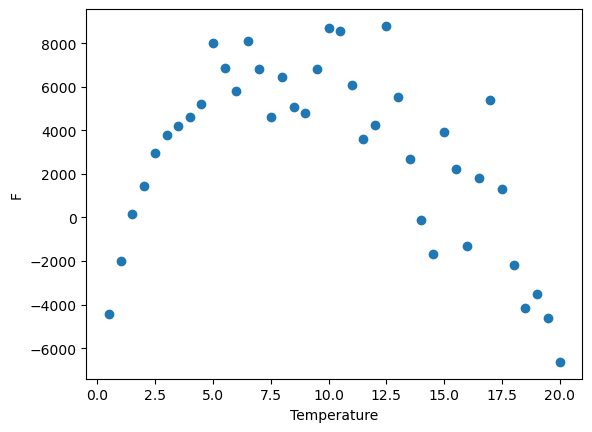

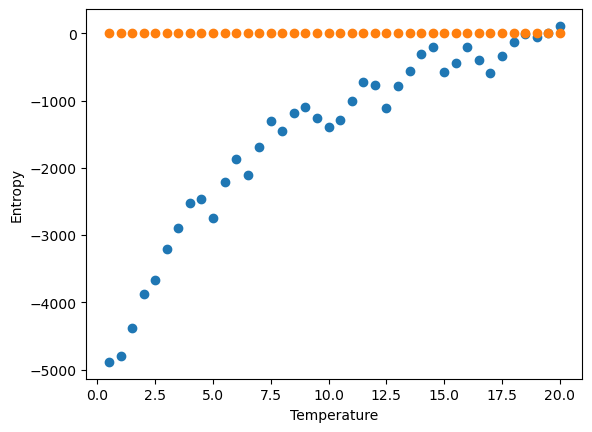

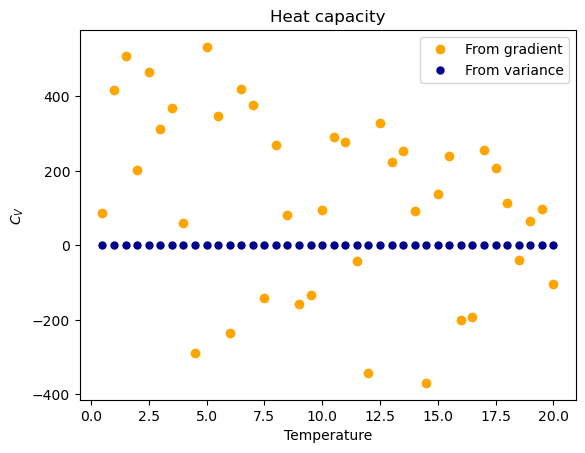

In [62]:
def stirling(x):
    res = x*np.log(x)-x
    return res

def multiplicity(size, B_num):
    N = size**2
    multiplicity = stirling(N)-stirling(B_num)-stirling(N-B_num)
    return multiplicity

def the_physics(T, E_mean, E_var, M, B_num, muB, T_num, muT, size):
     
    S_ref = np.log(M)   
    G_T = muT*T_num
    G_B = muB*B_num[-1]
    print(G_T,G_B)
    
    Cv_variance = np.zeros([len(T)])
    G = np.zeros([len(T)])
    for i in range(len(T)):
        x = (B_num[i]+T_num)/size**2
        print(x)
        Cv_variance[i] = E_var[i]/T[i]**2
        G[i] = (1-x)*G_T + x*G_B - T[i]*(x*np.log(x)+(1-x)*np.log(1-x))
        #G[i]=T[i]*(x*np.log(x)+(1-x)*np.log(1-x))
        #print(T[i])
    Cv_gradient = np.gradient(E_mean,T)        
    Sgrad = S_ref - np.cumsum(Cv_gradient)
    Svar = S_ref - np.cumsum(Cv_variance)
    F = E_mean - T*Sgrad
     
    return Cv_gradient, Cv_variance, Sgrad, Svar, F, G

M = multiplicity(size, B_num)
Cv_grad, Cv_var, Sgrad, Svar, F, G =the_physics(T, E_mean, E_var, M, B_num, muB, T_num, muT,size) 

# FIGURES 

# Mean Energy
plt.figure()
plt.plot(T,E_mean,'o')
plt.xlabel('Temperature')
plt.ylabel('Mean Energy')
#plt.title(f'Mean Energy, T_num: {Tcell_num}, B_num: {Bacteria_num}')
#plt.savefig(f'Runs_data/{datetime_str}U_mean.pdf', format = 'pdf')
plt.show()

# Gibbs Energy
plt.figure()
plt.plot(T,G,'o')
plt.xlabel('Temperature')
plt.ylabel('Gibbs energy')
plt.show()

# Helmholtz Free Energy
plt.figure()
plt.plot(T,F,'o')
plt.xlabel('Temperature')
plt.ylabel('F')
#plt.title('Helmholtz Free Energy')
plt.show()

# Entropy
plt.figure()
plt.plot(T,Sgrad,'o', label = 'from variance' )
plt.plot(T,Svar,'o', label = 'from gradient' )
plt.xlabel('Temperature')
plt.ylabel('Entropy')
#plt.title('Entropy')
plt.show()

# Heat capacity   
plt.figure()
plt.plot(T,Cv_grad,'o', color = 'orange', label = 'From gradient')
plt.plot(T,Cv_var, '.', markersize = '10', color = 'darkblue', label = 'From variance')
plt.xlabel('Temperature')
plt.ylabel('$C_{V}$')
plt.title(f'Heat capacity')
plt.legend()
#plt.savefig(f'Runs_data/{datetime_str}Cv.png')
plt.show()